### Business Understanding: Importance of Credit Risk Analysis in Commodity Trading

**Credit Risk Analysis in Commodity Trading**

In the volatile world of commodity trading, credit risk analysis is a cornerstone for maintaining financial stability. Commodity trades often involve high-value transactions with counterparties such as suppliers, buyers, and financial institutions. Due to fluctuating market conditions, geopolitical factors, and price volatility, the risk of default by counterparties is significant. Credit risk analysis helps mitigate these risks by evaluating the financial health of counterparties, enabling businesses to make informed decisions and safeguard their liquidity and profitability.

**Role of Internal Ratings in Credit Risk Analysis**

Internal ratings are a critical component of credit risk frameworks within organizations. Unlike external ratings (e.g., those provided by agencies like Moody's or S&P), internal ratings are tailored to reflect the company's specific risk appetite and business context. These ratings:

1.  **Enhance Risk Differentiation**: Internal ratings provide a nuanced understanding of counterparty risk by incorporating proprietary data and metrics, which external ratings may overlook.
    
2.  **Support Risk-Adjusted Decision Making**: They enable traders and risk managers to align credit exposure with the company's risk tolerance, optimizing trade volumes and limiting exposure to high-risk entities.
    
3.  **Enable Regulatory Compliance**: Internal ratings often play a pivotal role in meeting regulatory requirements for risk management, ensuring adherence to guidelines like Basel III or other industry-specific standards.
    
4.  **Inform Pricing and Collateral Decisions**? Companies can use internal ratings to determine appropriate pricing strategies and collateral requirements, ensuring risk-adjusted returns on trades.
    

**Why It Matters for This Analysis**

By predicting internal ratings accurately, organizations can proactively identify high-risk counterparties, allocate resources effectively, and avoid financial losses. This predictive modeling project seeks to enhance the reliability of internal ratings by leveraging data-driven approaches, ultimately supporting more robust credit risk management in commodity trading.

#### **Source Data Overview**

The dataset used for this analysis, `enriched_financials_data.csv`, is a comprehensive collection of financial and rating-related information for various companies, designed to support credit risk analysis in commodity trading. It includes **2029 rows and 36 columns**, covering a mix of qualitative and quantitative features.

**Key Features:**

1.  **Rating Information:**
    
    *   **External Ratings (e.g., A, BBB):** Provided by external rating agencies like Moody’s or S&P.
        
    *   **Internal Ratings:** A proprietary score ranging from 1 to 10, reflecting the company’s internal assessment of counterparty creditworthiness.
        
2.  **Financial Ratios and Metrics:**
    
    *   **Liquidity Ratios (e.g., currentRatio, cashRatio):** Indicate the counterparty's ability to meet short-term obligations.
        
    *   **Profitability Ratios (e.g., netProfitMargin, returnOnAssets):** Measure overall financial health and operational efficiency.
        
    *   **Leverage Ratios (e.g., debtRatio, debtEquityRatio):** Highlight the company’s financial structure and risk of default.
        
3.  **Exposure Metrics:**
    
    *   **Current Exposure, Long-Term Exposure, Total Exposure:** Indicate the financial value of the company's credit exposure to the counterparty.
        
    *   **Negative Exposure:** Highlights situations where the company owes money to the counterparty, reversing the risk perspective.
        
4.  **Other Attributes:**
    
    *   **Sector:** Indicates the industry of the counterparty (e.g., energy, manufacturing).
        
    *   **Company Identifiers (Name, Symbol):** Provide unique information about the counterparties.

#### Data Understanding

**Objectives**
1. Examine dataset structure, column types, and missing data.
2. Analyze numerical and categorical features with visualizations.
3. Identify potential outliers, patterns, and anomalies.

**Key Questions**
- Are there missing values or data quality issues?
- What are the distributions of numerical features?
- Are there relationships between features (numerical and categorical)?


In [17]:
# Step 1: Dataset Overview
import pandas as pd

# Load the dataset
data_path = "./Data/enriched_financials_data.csv"
df = pd.read_csv(data_path)

# Display dataset shape, column names, data types, and first few rows
print("Dataset Shape:", df.shape)
print("\nColumns and Data Types:\n", df.dtypes)
print("\nFirst Five Rows:\n", df.head())


Dataset Shape: (2029, 36)

Columns and Data Types:
 Rating                                 object
Name                                   object
Symbol                                 object
Rating Agency Name                     object
Date                                   object
Sector                                 object
currentRatio                          float64
quickRatio                            float64
cashRatio                             float64
daysOfSalesOutstanding                float64
netProfitMargin                       float64
pretaxProfitMargin                    float64
grossProfitMargin                     float64
operatingProfitMargin                 float64
returnOnAssets                        float64
returnOnCapitalEmployed               float64
returnOnEquity                        float64
assetTurnover                         float64
fixedAssetTurnover                    float64
debtEquityRatio                       float64
debtRatio                   

*   **Shape of the Dataset**:
    
    *   The dataset contains **2029 rows** and **36 columns**.
        
*   **Column Types**:
    
    *   **Categorical**: `Rating`, `Name`, `Symbol`, `Rating Agency Name`, `Date`, `Sector`.
        
    *   **Numerical**: Financial and exposure-related columns like `currentRatio`, `netProfitMargin`, `Current_Exposure`, and `Internal_Rating`.
        
*   **Sample Data**:
    
    *   The first few rows show data for different counterparties and their financial metrics, external ratings, and exposures.

**Next Step: Missing Values Analysis**

Before diving into the distributions and relationships, let's check for missing values. Missing data is critical to identify as it can affect analysis and modeling.

Columns with Missing Values:
 External_Rating_Numeric    8
Internal_Rating            8
dtype: int64


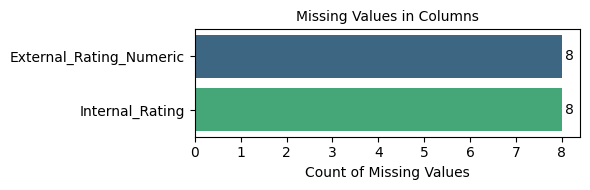

In [18]:
# Step 2: Missing Values Analysis

# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:\n", missing_values)

# Plot missing values as a horizontal bar chart
if not missing_values.empty:
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Sort the missing values in descending order
    missing_values = missing_values.sort_values(ascending=True)

    # Set the color palette
    sns.set_palette("viridis", n_colors=len(missing_values))

    plt.figure(figsize=(6, 2))
    sns.barplot(x=missing_values.values, y=missing_values.index, hue=missing_values.index, palette="viridis")
    plt.title("Missing Values in Columns", fontsize=10)
    plt.xlabel("Count of Missing Values", fontsize=10)
    plt.ylabel("", fontsize=9)

    # Add value labels to each bar
    for index, value in enumerate(missing_values.values):
        plt.text(value + max(missing_values.values)*0.01, index,     # Adjust position for visibility
                 f"{value}", va='center', fontsize=10)

    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected in the dataset.")


*   Two columns have missing values:
    
    *   **External\_Rating\_Numeric**: 8 missing values.
        
    *   **Internal\_Rating**: 8 missing values.
        
*   The missing values count is relatively small compared to the dataset size (2029 rows).

**Next Step: Handling Missing Values**

**Options for Handling Missing Data:**

1.  **External\_Rating\_Numeric**:
    
    *   Use the median or mean of the column to fill missing values (since it's a numeric feature derived from categorical ratings).
        
    *   Alternatively, fill with 0 or a special value if missing values have specific meaning.
        
2.  **Internal\_Rating**:
    
    *   This is the target variable for our ML model, so:
        
        *   If the missing values are very few (e.g., 8), we can exclude these rows from the analysis.
            
        *   Alternatively, predict missing ratings using other features (imputation).

In [19]:
# Step 3: Handling Missing Values

# Fill missing External_Rating_Numeric with median
# df["External_Rating_Numeric"].fillna(df["External_Rating_Numeric"].median(), inplace=True)
df["External_Rating_Numeric"] = df["External_Rating_Numeric"].fillna(df["External_Rating_Numeric"].median())

# Drop rows with missing Internal_Rating (target variable)
df = df[df["Internal_Rating"].notnull()]

# Verify no missing values remain
print("\nMissing Values After Handling:\n", df.isnull().sum())



Missing Values After Handling:
 Rating                                0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0
cashPer

*   Missing values have been successfully handled:
    
    *   **External\_Rating\_Numeric**: Filled with the median.
        
    *   **Internal\_Rating**: Rows with missing values were dropped.
        
*   The dataset is now clean, with **no missing values**.

**Next Step: Analyze Numerical Variables**

**Objective:**

*   Understand the distribution of numerical features to identify patterns, outliers, and skewness.


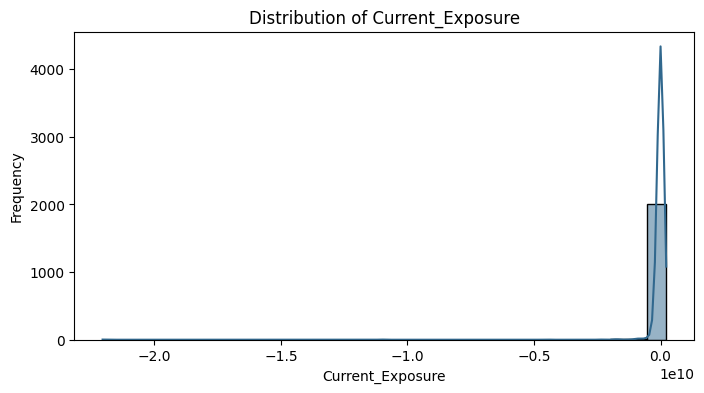

In [49]:
# Step 4: Analyze Numerical Variables - Distribution of 'Current_Exposure'

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for Current_Exposure
plt.figure(figsize=(8, 4))
sns.histplot(df["Current_Exposure"], kde=True, bins=30)
plt.title("Distribution of Current_Exposure")
plt.xlabel("Current_Exposure")
plt.ylabel("Frequency")
plt.show()


*   **Distribution Plot**:
    
    *   The distribution is highly skewed with most values near zero but a long tail extending to large negative values.
        
    *   Negative values for Current\_Exposure may be unrealistic and need further investigation (e.g., data entry errors or unusual business rules).
        
*   **Box Plot**:
    
    *   There are significant outliers on both ends, with several extreme negative values.
        
    *   Most data points cluster tightly near the upper end (positive values close to zero).

Rows with Negative Current_Exposure:
      Rating                               Name Symbol  \
5        AA                  Schlumberger N.V.    SLB   
6        AA                  Schlumberger N.V.    SLB   
7         A                  Schlumberger N.V.    SLB   
12        A                  Sysco Corporation    SYY   
14        A                  Sysco Corporation    SYY   
...     ...                                ...    ...   
2016    BBB             Seagate Technology PLC    STX   
2017     BB  ManTech International Corporation   MANT   
2022     BB          Xperi Holding Corporation   XPER   
2024    BBB                          NVR, Inc.    NVR   
2025     BB        Kaiser Aluminum Corporation   KALU   

                      Rating Agency Name        Date                 Sector  \
5             Egan-Jones Ratings Company   7/18/2014                 Energy   
6             Egan-Jones Ratings Company   5/13/2014                 Energy   
7             Egan-Jones Ratings Company

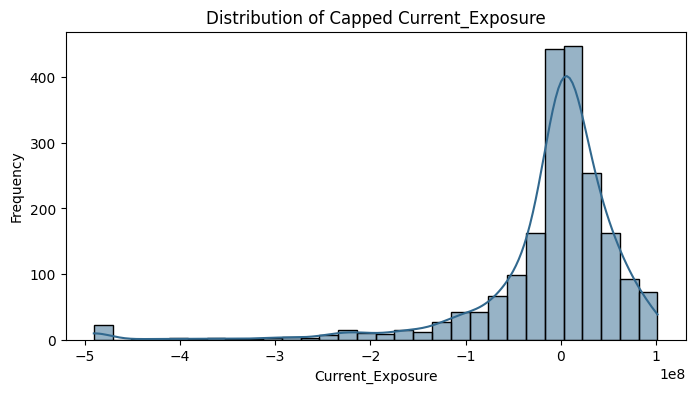

In [50]:
# Investigate negative values
negative_values = df[df["Current_Exposure"] < 0]
print("Rows with Negative Current_Exposure:\n", negative_values)

# Determine thresholds for capping
lower_bound = df["Current_Exposure"].quantile(0.01)
upper_bound = df["Current_Exposure"].quantile(0.99)
print(f"\nLower Bound (1st Percentile): {lower_bound}")
print(f"Upper Bound (99th Percentile): {upper_bound}")

# Cap outliers
df["Current_Exposure_Capped"] = df["Current_Exposure"].clip(lower=lower_bound, upper=upper_bound)

# Plot the capped distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["Current_Exposure_Capped"], kde=True, bins=30)
plt.title("Distribution of Capped Current_Exposure")
plt.xlabel("Current_Exposure")
plt.ylabel("Frequency")
plt.show()


**Validity of Negative Values**:

*   Are negative exposures valid in the dataset context (e.g., certain business rules)?
    
*   If valid, we retain them. If not, we consider imputing or removing rows with negative exposures.

Since negative values represent valid scenarios (counterparty being positively exposed to our company), we will retain them and proceed with the analysis. The capping we applied earlier to reduce extreme outliers is sufficient.

**Next Step: Analyze Another Numerical Variable**

We’ll now analyze the next relevant numerical variable, such as **Internal\_Rating**, as it’s the target variable and crucial for understanding.

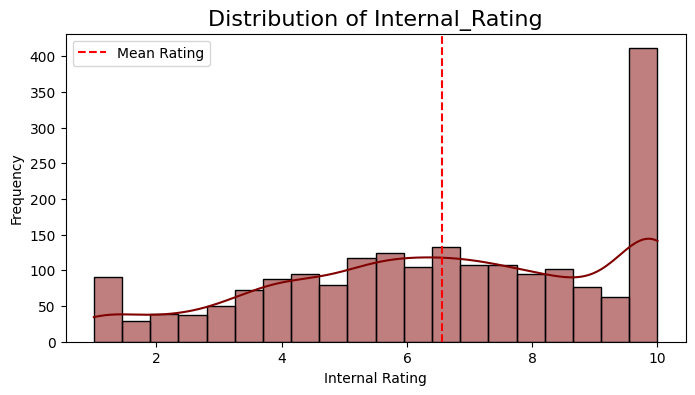

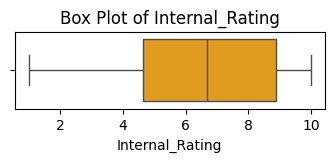

In [54]:
# Step 5: Analyze Numerical Variables - Distribution of 'Internal_Rating'

# Distribution plot for Internal_Rating
plt.figure(figsize=(8, 4))
sns.histplot(df['Internal_Rating'], kde=True, color='maroon', bins=20)
plt.title("Distribution of Internal_Rating", fontsize=16)
plt.xlabel("Internal Rating")
plt.ylabel("Frequency")
plt.axvline(df['Internal_Rating'].mean(), color='red', linestyle='--', label='Mean Rating')
plt.legend()
plt.show()

# Box plot for Internal_Rating
plt.figure(figsize=(4, 1))
sns.boxplot(x=df["Internal_Rating"], color='orange')
plt.title("Box Plot of Internal_Rating")
plt.xlabel("Internal_Rating")
plt.show()


*   **Distribution Plot**:
    
    *   The ratings are distributed across the range of 1 to 10.
        
    *   There is a **spike at 10**, indicating a significant number of counterparties with the highest rating.
        
    *   There’s also a notable concentration near the lower end (around 1), but the distribution is fairly uniform in the middle.
        
*   **Box Plot**:
    
    *   No apparent outliers in the Internal\_Rating column.
        
    *   The interquartile range spans approximately from 4 to 8, with the median close to 6.

Now, let’s investigate how Internal_Rating relates to key financial features like Current_Exposure, debtRatio, and netProfitMargin.

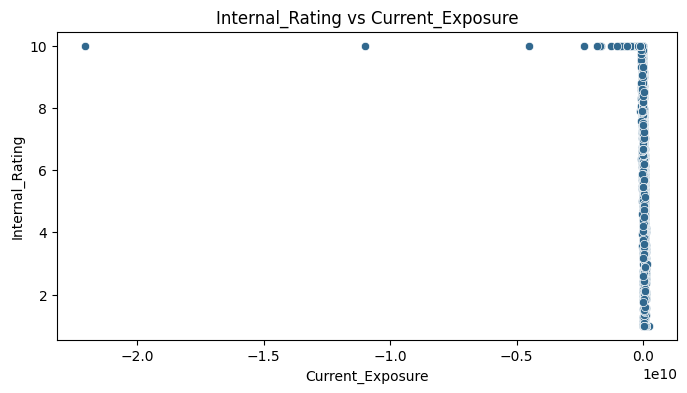

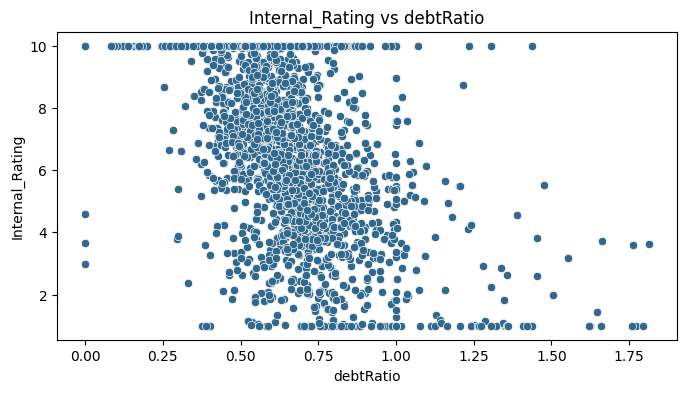

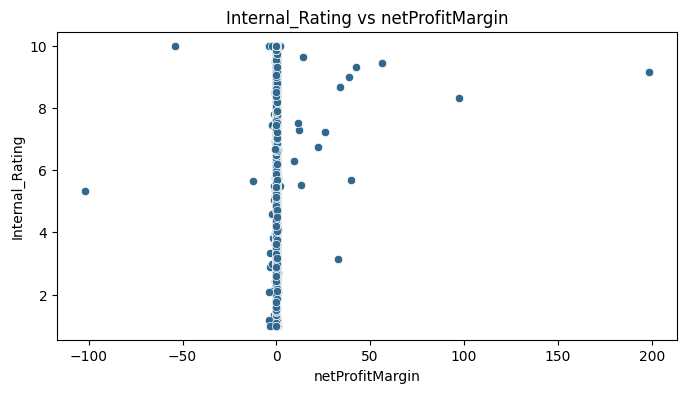

In [55]:
# Step 6: Analyze Relationships Between Internal_Rating and Key Features

# Scatter plot for Internal_Rating vs Current_Exposure
plt.figure(figsize=(8, 4))
sns.scatterplot(x="Current_Exposure", y="Internal_Rating", data=df)
plt.title("Internal_Rating vs Current_Exposure")
plt.xlabel("Current_Exposure")
plt.ylabel("Internal_Rating")
plt.show()

# Scatter plot for Internal_Rating vs debtRatio
plt.figure(figsize=(8, 4))
sns.scatterplot(x="debtRatio", y="Internal_Rating", data=df)
plt.title("Internal_Rating vs debtRatio")
plt.xlabel("debtRatio")
plt.ylabel("Internal_Rating")
plt.show()

# Scatter plot for Internal_Rating vs netProfitMargin
plt.figure(figsize=(8, 4))
sns.scatterplot(x="netProfitMargin", y="Internal_Rating", data=df)
plt.title("Internal_Rating vs netProfitMargin")
plt.xlabel("netProfitMargin")
plt.ylabel("Internal_Rating")
plt.show()


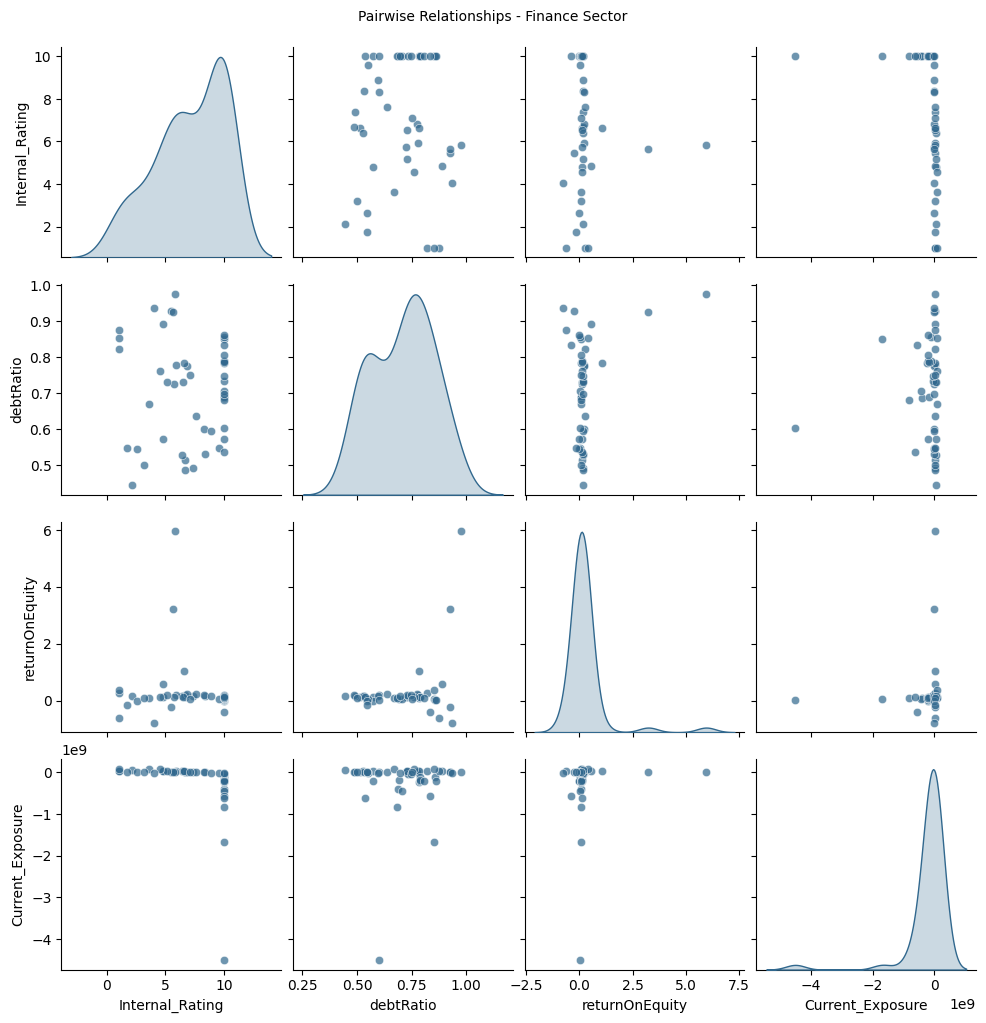

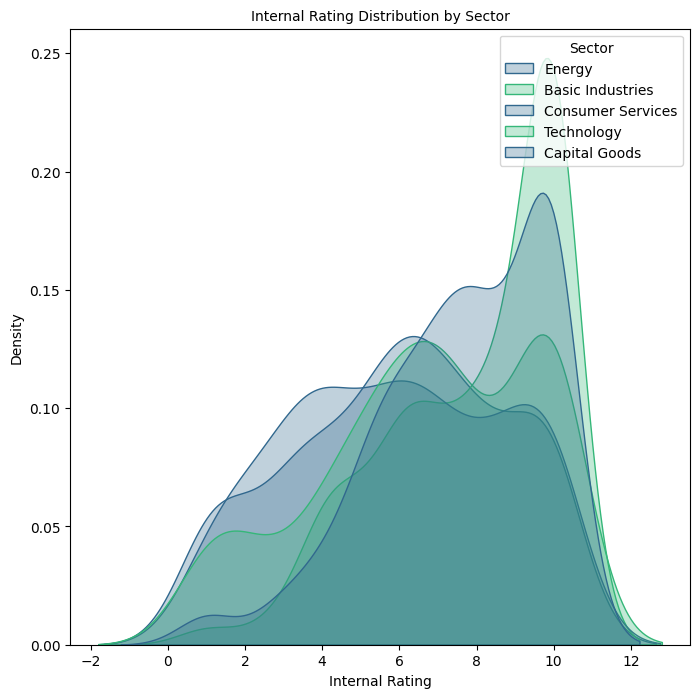

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few key financial metrics for pairwise plots
key_columns = ['Internal_Rating', 'debtRatio', 'returnOnEquity', 'Current_Exposure']
sector = "Finance"
sector_data = df[df['Sector'] == sector]

# Pairplot for the selected sector
sns.pairplot(sector_data[key_columns], diag_kind="kde", plot_kws={"alpha": 0.7})
plt.suptitle(f"Pairwise Relationships - {sector} Sector", y=1.02, fontsize=10)
plt.show()

# Filter for sectors with significant data points
top_sectors = df['Sector'].value_counts().index[:5]  # Top 5 sectors by count

# Plot histogram for Internal Rating for each sector
plt.figure(figsize=(8, 8))
for sector in top_sectors:
    sector_data = df[df['Sector'] == sector]
    sns.kdeplot(sector_data['Internal_Rating'], label=sector, fill=True, alpha=0.3)

plt.title("Internal Rating Distribution by Sector", fontsize=10)
plt.xlabel("Internal Rating")
plt.ylabel("Density")
plt.legend(title="Sector")
plt.show()


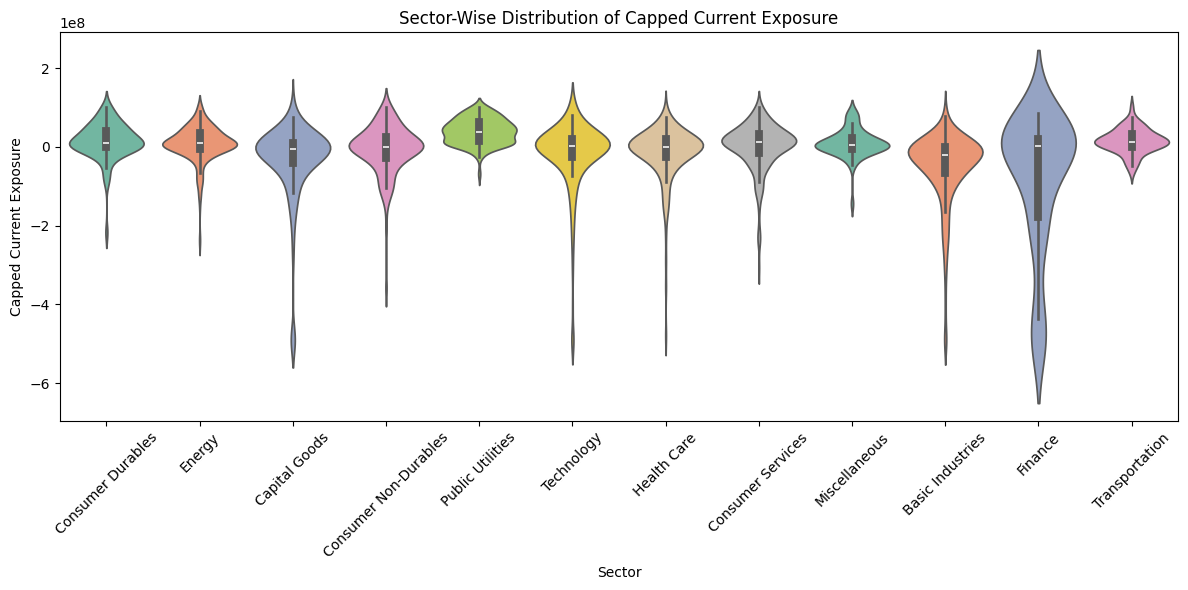

In [59]:
# Plot Sector-Wise Distribution of Debt Ratio
plt.figure(figsize=(12, 6))
# sns.violinplot(data=df, x='Sector', y='Current_Exposure_Capped', palette='Set2', scale='width')
sns.violinplot(data=df, x='Sector', y='Current_Exposure_Capped', hue='Sector', palette='Set2', density_norm='width', legend=False)

plt.title('Sector-Wise Distribution of Capped Current Exposure')
plt.xlabel('Sector')
plt.ylabel('Capped Current Exposure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*   **Internal\_Rating vs Current\_Exposure**:
    
    *   There’s a dense cluster of ratings at 10, regardless of exposure.
        
    *   Counterparties with extreme negative exposures seem to be rated higher (close to 10). This aligns with your clarification that negative exposure implies the counterparty is positively exposed to your company.
        
*   **Internal\_Rating vs debtRatio**:
    
    *   Most counterparties cluster around a debtRatio between 0.5 and 1.0.
        
    *   Higher ratings (close to 10) appear across all levels of debtRatio, though there’s a slight trend of higher ratings clustering in the middle range (around 0.75).
        
*   **Internal\_Rating vs netProfitMargin**:
    
    *   The data points are tightly clustered around a netProfitMargin near zero.
        
    *   There are a few extreme outliers (e.g., netProfitMargin > 50 or < -50), but no clear relationship is evident between netProfitMargin and Internal\_Rating.

*   **Internal\_Rating vs Sector**:
    
    *   High-rated sectors like Energy and Basic Industries might indicate industries where trading partners pose minimal credit risk.
        
    *   Lower-rated or widely spread sectors (e.g., Consumer Services, Technology) could necessitate closer scrutiny before trading.

*   **Sector Comparison**:

    -   The width of each violin represents the density of companies at various debt ratio levels within that sector.
    -   Sectors like Finance and Public Utilities exhibit more variability, indicating diverse leverage levels among companies.
    -   Sectors such as Consumer Durables and Technology have more concentrated distributions, suggesting consistency in financial leverage.

The relationships suggest that `Internal_Rating` is not strongly influenced by `Current_Exposure` or `netProfitMargin` alone. However, the debtRatio may have a mild influence within a specific range.

**Correlation Analysis**:

*   Let’s quantify relationships using a correlation matrix to see which variables are most strongly related to Internal\_Rating.


Top Correlations with Internal_Rating:
 Internal_Rating                       1.000000
External_Rating_Numeric               0.430350
cashRatio                             0.142087
currentRatio                          0.068988
operatingCashFlowSalesRatio           0.053668
returnOnAssets                        0.049470
returnOnCapitalEmployed               0.049079
freeCashFlowOperatingCashFlowRatio    0.042846
operatingProfitMargin                 0.039582
pretaxProfitMargin                    0.038703
ebitPerRevenue                        0.038156
netProfitMargin                       0.037595
payablesTurnover                      0.030891
cashPerShare                          0.011701
effectiveTaxRate                      0.011411
freeCashFlowPerShare                  0.010844
quickRatio                            0.009212
daysOfSalesOutstanding                0.006101
operatingCashFlowPerShare             0.006055
debtEquityRatio                      -0.024798
companyEquityMultip

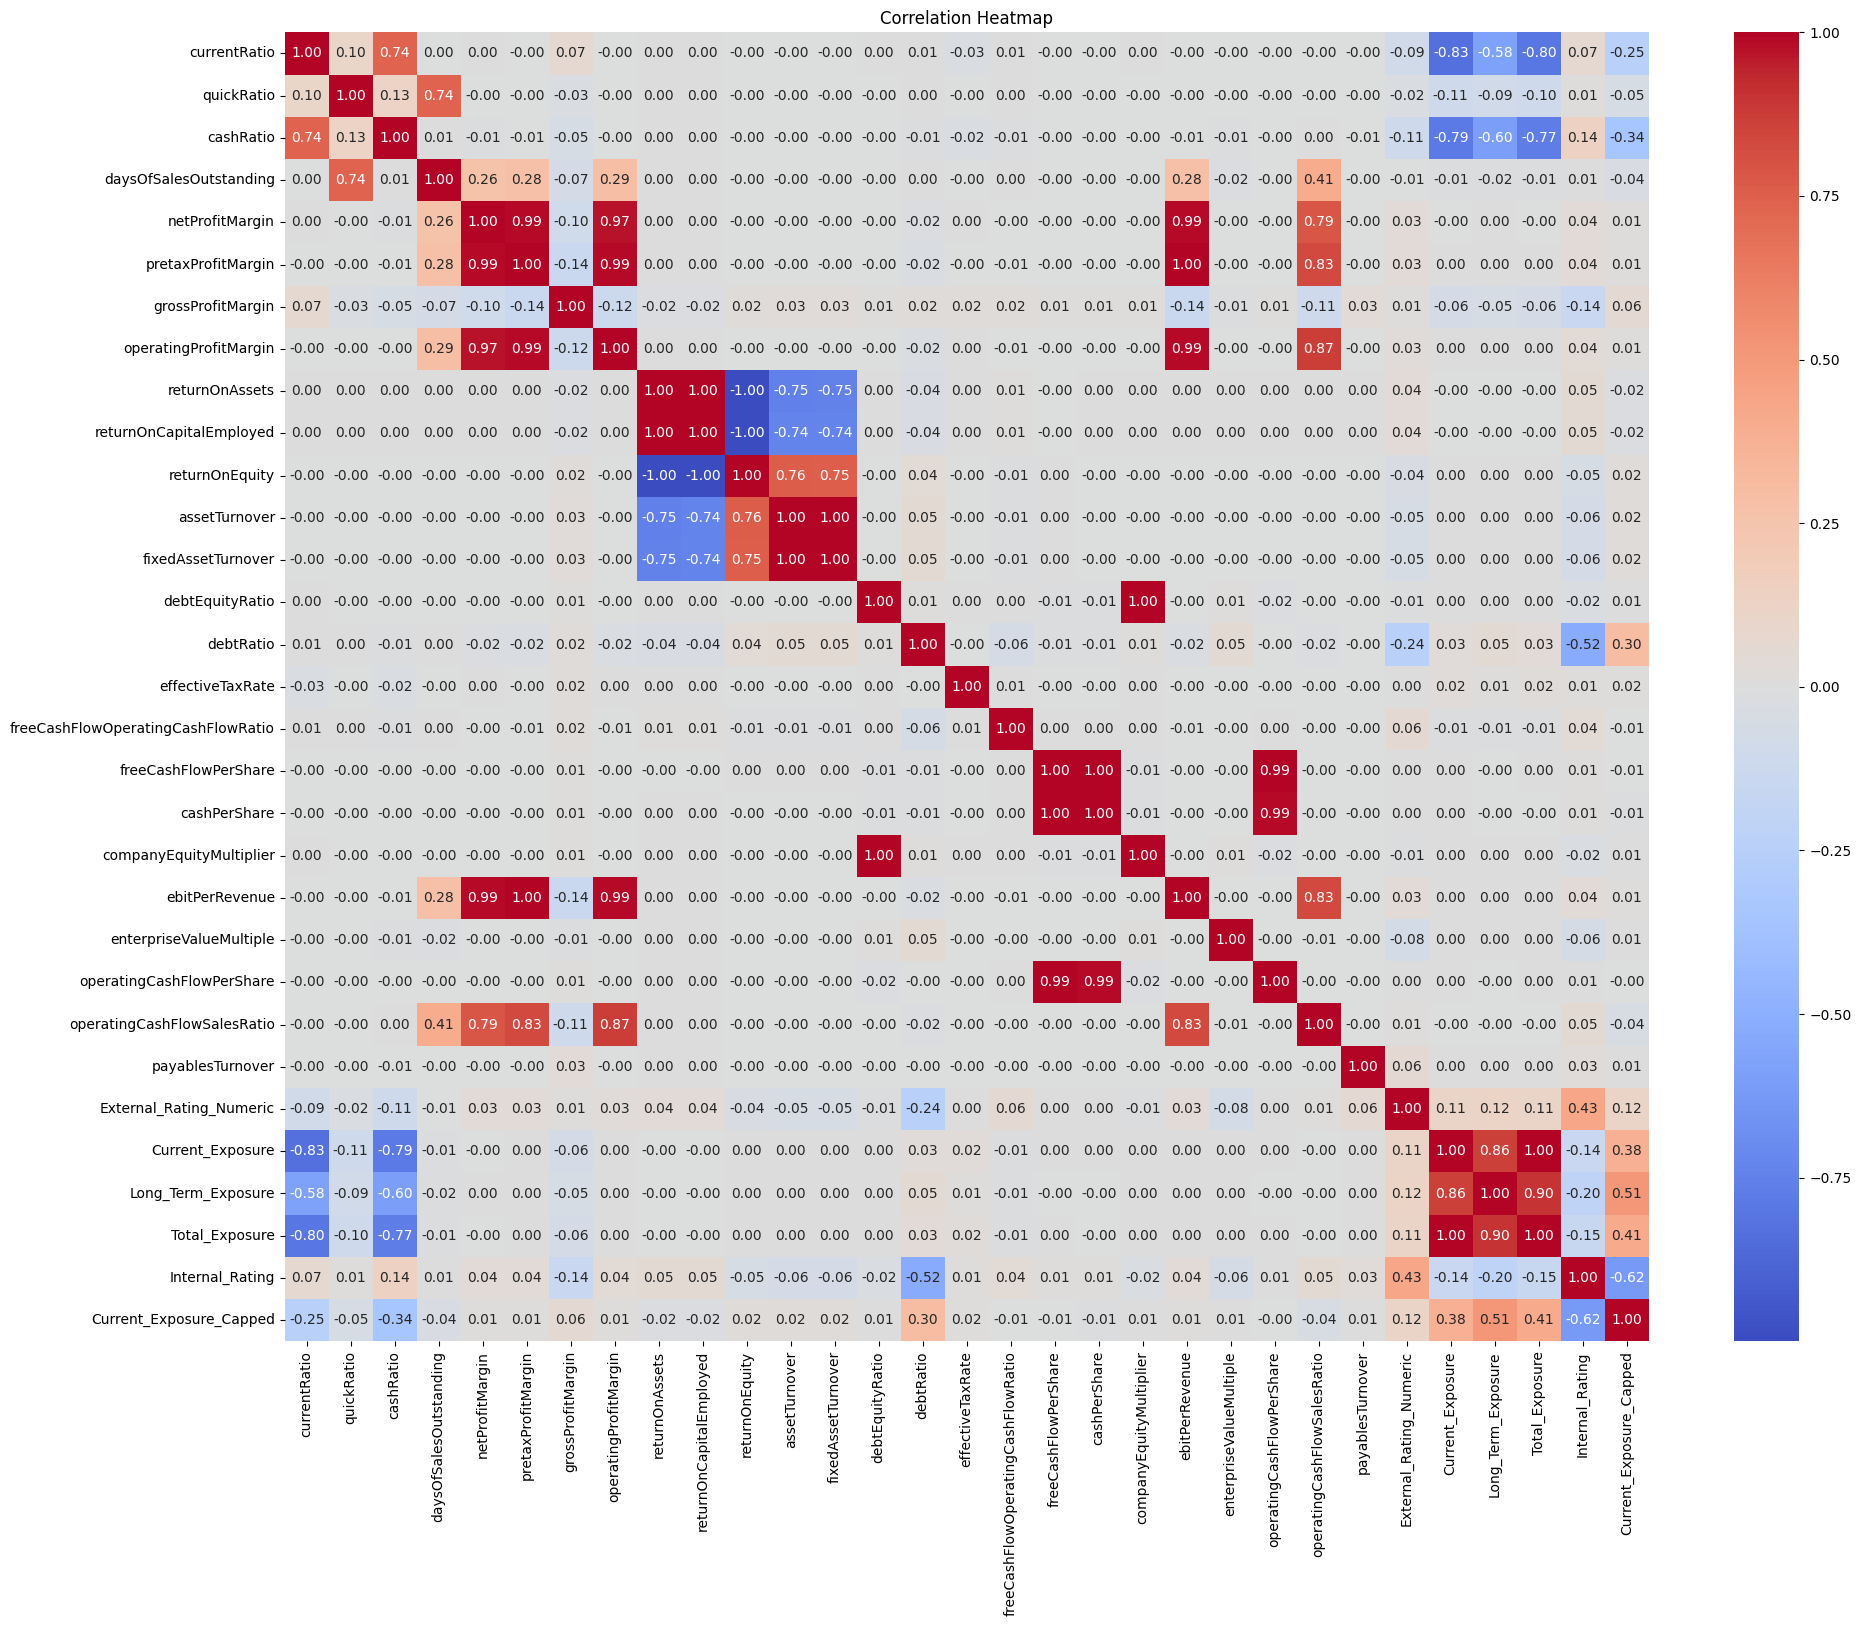

In [27]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Correlation Analysis

# Filter numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix for numerical features
correlation_matrix = numeric_df.corr()

# Focus on correlations with Internal_Rating
if "Internal_Rating" in correlation_matrix.columns:
    internal_rating_corr = correlation_matrix["Internal_Rating"].sort_values(ascending=False)
    # Print top correlations
    print("\nTop Correlations with Internal_Rating:\n", internal_rating_corr)
else:
    print("Internal_Rating column not found in numeric features.")

# Heatmap for correlations
plt.figure(figsize=(22, 17))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


*   **Strong Positive Correlations with Internal\_Rating**:
    
    *   **External\_Rating\_Numeric (0.43)**: This is the strongest positive correlation, indicating that external ratings play a significant role in determining internal ratings.
        
    *   **cashRatio (0.14)**: A weaker positive correlation suggests that higher liquidity is associated with better internal ratings.
        
*   **Moderate to Strong Negative Correlations with Internal\_Rating**:
    
    *   **Current\_Exposure\_Capped (-0.62)**: Indicates that higher exposure leads to lower internal ratings, which aligns with risk evaluation.
        
    *   **debtRatio (-0.52)**: Suggests that higher leverage is associated with lower internal ratings.
        
    *   **Long\_Term\_Exposure (-0.20)** and **Total\_Exposure (-0.15)**: These also negatively correlate with internal ratings, reinforcing the role of exposure in risk assessment.
        
*   **Weak Correlations**:
    
    *   Most other features, including profitability ratios (e.g., netProfitMargin, returnOnAssets), show weak or negligible correlations with Internal\_Rating.

**Decision**

We’ll retain all financial features for modeling to ensure their potential impact is not overlooked. Instead of narrowing the feature set based solely on correlation, we’ll focus on:

1.  Feature scaling or transformation (if necessary) to ensure all features contribute equally to the model.
    
2.  Using models capable of handling less predictive features effectively (e.g., tree-based models like Random Forest or Gradient Boosting).
    
3.  Analyzing feature importance during and after modeling.

**Next Step**

1.  **Feature Engineering and Preparation**:
    
    *   Prepare the dataset for modeling by handling categorical variables and ensuring numerical features are scaled or transformed as needed.

In [28]:
# Step 8: Feature Engineering and Preparation (Updated)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Drop irrelevant categorical columns
irrelevant_columns = ["Name", "Symbol", "Rating Agency Name", "Date"]
X = df.drop(columns=["Internal_Rating"] + irrelevant_columns)  # Features
y = df["Internal_Rating"]  # Target

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),
    ]
)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Output preprocessed data shape
print("Shape of Preprocessed Training Data:", X_train_preprocessed.shape)
print("Shape of Preprocessed Testing Data:", X_test_preprocessed.shape)


Shape of Preprocessed Training Data: (1616, 47)
Shape of Preprocessed Testing Data: (405, 47)


#### **Next Step: Modeling**

Now, we’ll proceed with training machine learning models to predict Internal\_Rating based on the features.

**Plan for Modeling**:

1.  Train a few baseline models:
    
    *   **Linear Regression** (baseline model).
        
    *   **Random Forest Regressor** (non-linear model).
        
    *   **XGBoost Regressor** (boosting-based model).
        
2.  Evaluate models using:
    
    *   Mean Squared Error (MSE).
        
    *   R-squared (R²).
        
3.  Compare model performances and select the best one for hyperparameter tuning.

In [29]:
# Step 9: Modeling - Train Multiple Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train models
linear_model.fit(X_train_preprocessed, y_train)
rf_model.fit(X_train_preprocessed, y_train)
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_preprocessed)
y_pred_rf = rf_model.predict(X_test_preprocessed)
y_pred_xgb = xgb_model.predict(X_test_preprocessed)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("Linear Regression: MSE =", mse_linear, "R² =", r2_linear)
print("Random Forest: MSE =", mse_rf, "R² =", r2_rf)
print("XGBoost: MSE =", mse_xgb, "R² =", r2_xgb)

Linear Regression: MSE = 333728.85083444597 R² = -43231.13721293929
Random Forest: MSE = 0.2861568636454176 R² = 0.9629304665670633
XGBoost: MSE = 0.22688190549273127 R² = 0.9706091048320522


Let's try k-Fold Cross-Validation. Using `cross_val_score` for Quick Evaluation

In [30]:
from sklearn.model_selection import cross_val_score

# Define k-fold
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross_val_score
linear_cv_scores = cross_val_score(linear_model, X_train_preprocessed, y_train, cv=kf, scoring='r2')
rf_cv_scores = cross_val_score(rf_model, X_train_preprocessed, y_train, cv=kf, scoring='r2')
xgb_cv_scores = cross_val_score(xgb_model, X_train_preprocessed, y_train, cv=kf, scoring='r2')

print("Linear Regression CV R²:", linear_cv_scores.mean())
print("Random Forest CV R²:", rf_cv_scores.mean())
print("XGBoost CV R²:", xgb_cv_scores.mean())


Linear Regression CV R²: -1355754.9672889165
Random Forest CV R²: 0.9633018472401649
XGBoost CV R²: 0.9671741539653294


**Model Performance Analysis**

1.  **Linear Regression**:
    
    *   MSE: **333,729** (extremely high).
        
    *   R²: **\-43,231** (very poor fit, suggesting the model fails to capture the relationship between features and Internal\_Rating).
        
    *   **Conclusion**: Linear regression is not suitable for this dataset. The relationships in the data are likely non-linear or involve complex interactions, which linear models cannot capture.
        
2.  **Random Forest**:
    
    *   MSE: **0.286** (much lower, indicating a good fit).
        
    *   R²: **0.96** (explains 96% of the variance in Internal\_Rating).
        
    *   **Conclusion**: Random Forest performs well, capturing non-linear relationships and feature interactions.
        
3.  **XGBoost**:
    
    *   MSE: **0.227** (the lowest among the models).
        
    *   R²: **0.97** (explains 97% of the variance, outperforming Random Forest).
        
    *   **Conclusion**: XGBoost performs the best, likely due to its ability to handle complex relationships and fine-tune decision boundaries.

        


**Key Takeaways**

*   **XGBoost** is the best-performing model, followed by **Random Forest**.
    
*   **Linear Regression** is not suitable for this problem due to the non-linear nature of the data.
    
        


---------------------------------------------------
**After k-Fold Cross-Validation**

**Linear Regression**

*   **Original R²:** -43,231
    
*   **CV R²:** -1355754
    
    *   The performance for linear regression is extremely poor in both cases, but the CV result shows even worse performance. This variability arises because linear regression is highly sensitive to outliers and feature scaling, which may be exacerbated in different folds during cross-validation.
        
    *   **Conclusion:** Linear regression is not suitable for this problem due to the complexity of the data and non-linear relationships.
        

**Random Forest**

*   **Original R²:** 0.9629
    
*   **CV R²:** 0.9633
    
    *   Random forest shows consistent performance across both single train-test split and cross-validation. This indicates that the model generalizes well to unseen data.
        
    *   **Conclusion:** Random forest is a strong candidate, with reliable performance and minimal variance.
        

**XGBoost**

*   **Original R²:** 0.9706
    
*   **CV R²:** 0.9672
    
    *   XGBoost has a slightly lower R² in cross-validation compared to the original train-test split. This is expected as cross-validation provides a more robust estimate by averaging performance across multiple folds.
        
    *   **Conclusion:** XGBoost remains the best-performing model, with a slight edge over random forest.

----------------------------------------------------------

**Next Steps**

1.  **Hyperparameter Tuning**:
    
    *   Fine-tune the Random Forest and XGBoost models to further improve performance.
        
    *   Use techniques like Grid Search or Randomized Search to optimize hyperparameters.
        
2.  **Feature Importance Analysis**:
    
    *   Analyze the feature importance from XGBoost and Random Forest to understand which features contribute the most to the predictions.

Next, let’s focus on hyperparameter tuning for Random Forest and XGBoost using Grid Search. This process will help us find the best combination of hyperparameters for each model to maximize performance.

In [31]:
# Step 10: Hyperparameter Tuning for Random Forest and XGBoost

from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest with GridSearch
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search for Random Forest
print("Tuning Random Forest...")
rf_grid_search.fit(X_train_preprocessed, y_train)

# Best parameters for Random Forest
print("\nBest parameters for Random Forest:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost with GridSearch
xgb_grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=xgb_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the grid search for XGBoost
print("Tuning XGBoost...")
xgb_grid_search.fit(X_train_preprocessed, y_train)

# Best parameters for XGBoost
print("\nBest parameters for XGBoost:", xgb_grid_search.best_params_)
xgb_best_model = xgb_grid_search.best_estimator_

# Evaluate the tuned models
print("\nEvaluating Tuned Models...")

# Random Forest evaluation
y_pred_rf_tuned = rf_best_model.predict(X_test_preprocessed)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
print("Tuned Random Forest: MSE =", mse_rf_tuned, "R² =", r2_rf_tuned)

# XGBoost evaluation
y_pred_xgb_tuned = xgb_best_model.predict(X_test_preprocessed)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)
print("Tuned XGBoost: MSE =", mse_xgb_tuned, "R² =", r2_xgb_tuned)


Tuning Random Forest...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuning XGBoost...
Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

Evaluating Tuned Models...
Tuned Random Forest: MSE = 0.2797577893286049 R² = 0.9637594199470558
Tuned XGBoost: MSE = 0.19963991984712512 R² = 0.9741381052718974


**Best Parameters**

*   **Random Forest**:
    
    *   max\_depth: None
        
    *   min\_samples\_leaf: 1
        
    *   min\_samples\_split: 2
        
    *   n\_estimators: 200
        
*   **XGBoost**:
    
    *   learning\_rate: 0.1
        
    *   max\_depth: 3
        
    *   n\_estimators: 300
        
    *   subsample: 0.8
        

**Performance of Tuned Models**

*   **Tuned Random Forest**:
    
    *   **MSE**: 0.2798
        
    *   **R²**: 0.9638
        
*   **Tuned XGBoost**:
    
    *   **MSE**: 0.1996
        
    *   **R²**: 0.9741

The XGBoost model has outperformed the Random Forest model after tuning, achieving a lower MSE and a higher R² score.

In [47]:
# Get feature importances and the corresponding feature names
import pandas as pd
import numpy as np
from xgboost import plot_importance

from sklearn.compose import ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Extract feature importances
feature_importances = xgb_best_model.get_booster().get_score(importance_type='weight')

# Map feature importances to feature names
features = pd.DataFrame({
    'Feature': list(feature_importances.keys()),
    'Importance': list(feature_importances.values())
})

# Sort features by importance
features = features.sort_values(by='Importance', ascending=False)

# Map feature indices to actual names
features['Feature_Name'] = [feature_names[int(f[1:])] for f in features['Feature']]


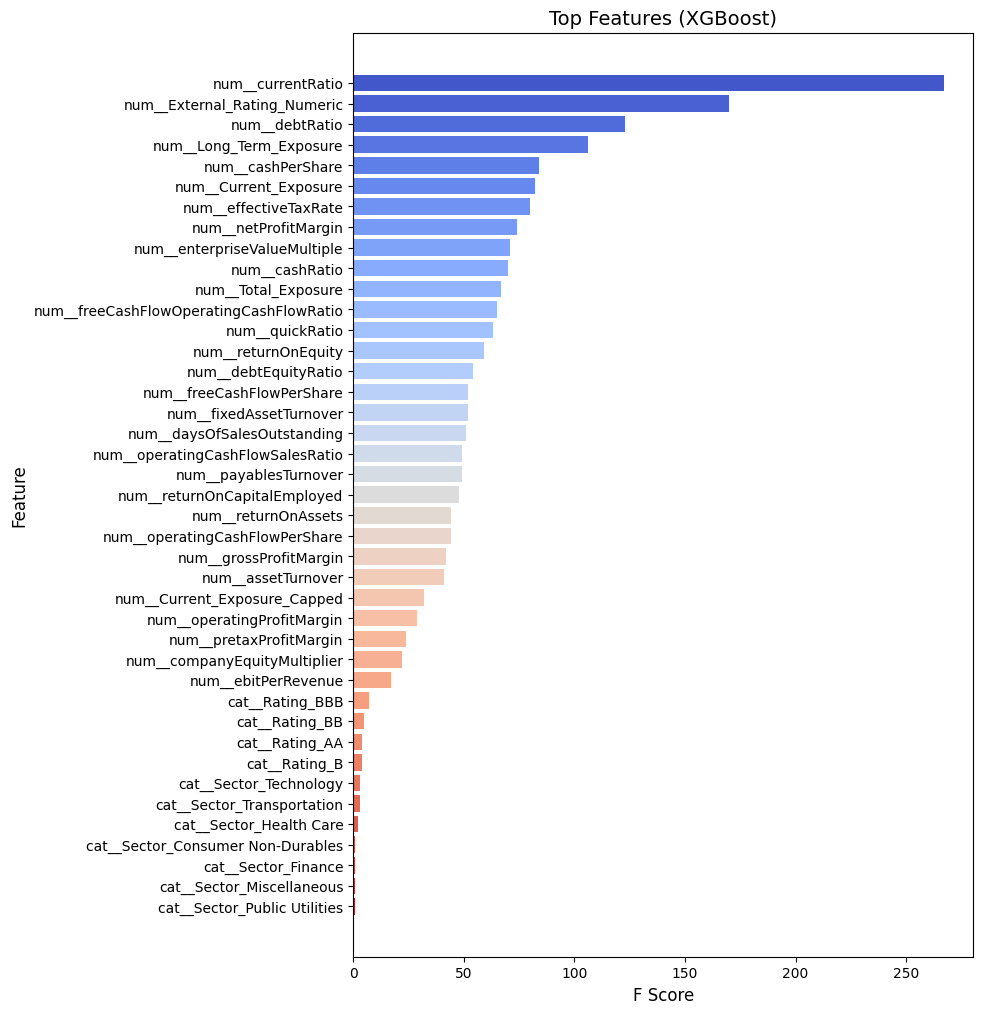

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features_sorted = features.sort_values(by='Importance', ascending=False)

# Create a color gradient
colors = sns.color_palette("coolwarm", len(features_sorted))

# Plot
plt.figure(figsize=(8, 12))
plt.barh(
    features_sorted['Feature_Name'],
    features_sorted['Importance'],
    color=colors
)
plt.xlabel('F Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top Features (XGBoost)', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


-   **Highly Influential Features**:

    -   `num_currentRatio` is the most important feature, indicating that the company's ability to pay short-term liabilities plays a significant role in determining the internal rating.
    -   `num_External_Rating_Numeric` is the second most important feature, showcasing the significance of external credit ratings in predicting the internal rating.
    -   `num_debtRatio` and `num_Long_Term_Exposure` further highlight the importance of a company's financial leverage and long-term liabilities.
    
-   **Moderately Important Features**:

    -   Features like `num_cashPerShare`, `num_Current_Exposure`, and `num_effectiveTaxRate` play a significant role but are less important than the top two features.

-   **Categorical Features**:

    -   Categorical features such as `cat_Rating_BBB`, `cat_Rating_BB`, and sectors like `cat_Sector_Technology` and `cat_Sector_Transportation` also contribute but with lower importance.
    
The plot emphasizes the importance of both numerical and categorical variables in the model. However, numerical features dominate the top slots, underlining their critical role in determining internal ratings.

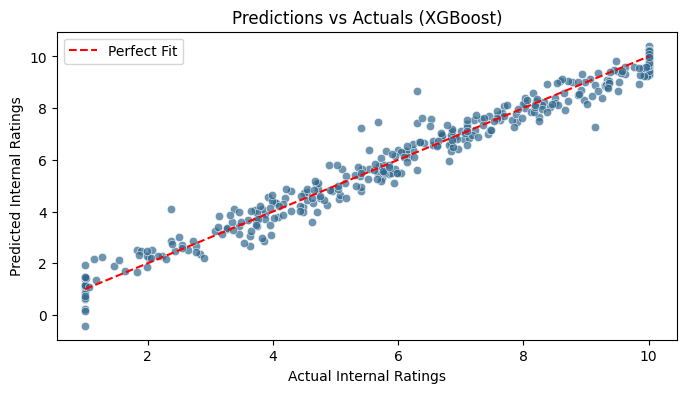

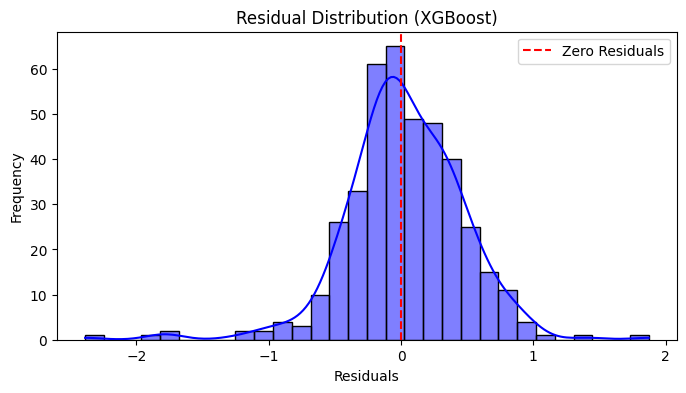

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions using the tuned XGBoost model
y_pred_xgb_tuned = xgb_best_model.predict(X_test_preprocessed)

# Create a scatter plot for predictions vs actuals
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred_xgb_tuned, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")
plt.xlabel("Actual Internal Ratings")
plt.ylabel("Predicted Internal Ratings")
plt.title("Predictions vs Actuals (XGBoost)")
plt.legend()
plt.show()

# Residuals plot
residuals = y_test - y_pred_xgb_tuned
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.axvline(0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residual Distribution (XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()
import pandas as pd


**Inference from the "Predictions vs Actuals (XGBoost)" Plot:**

1.  **Alignment with the Perfect Fit Line**:

    -   The majority of the points are clustered along the red dashed "Perfect Fit" line, indicating that the model's predictions are closely aligned with the actual internal ratings. This suggests the XGBoost model has captured the underlying patterns in the data effectively.

2.  **Good Predictive Performance**:

    -   There is minimal scatter or deviation from the line, reinforcing the model's high predictive accuracy and its ability to generalize well on unseen data.

3.  **Outliers**:

    -   A few points deviate significantly from the perfect fit line, indicating instances where the model predictions were less accurate. These could be due to noise, extreme values, or features not captured effectively by the model.
    
4.  **Overall Fit**:

    -   This visualization validates the high R2R^2R2 score observed during evaluation, showcasing the XGBoost model's ability to explain most of the variance in the target variable.ots, underlining their critical role in determining internal ratings.

**Inference from the "Residual Distribution (XGBoost)" Plot:**

1.  **Normal Distribution of Residuals**:

    -   The residuals are symmetrically distributed around zero and follow a bell-shaped curve, which is a desirable characteristic. This suggests the model has no systematic bias and that the errors are randomly distributed.

2.  **Small Residual Values**:

    -   The residuals are concentrated near zero, with few outliers. This indicates that the majority of the predictions were very close to the actual values.

3.  **Model's Assumptions**:

    -   A well-centered residual distribution suggests that the model's assumptions, such as linearity between predictions and actuals, hold true.
    
4.  **Presence of Outliers**:

    -   A few residuals extend further away from zero, suggesting some mispredictions. Investigating these cases could reveal patterns, such as missing data, feature transformations, or unmodeled interactions, that can help improve the model.

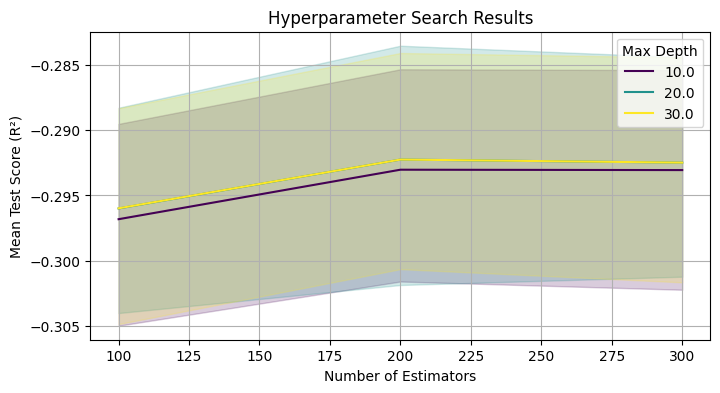

In [69]:
import pandas as pd

results = pd.DataFrame(rf_grid_search.cv_results_)

plt.figure(figsize=(8, 4))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', palette='viridis')
plt.title('Hyperparameter Search Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (R²)')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()


-   **Impact of Number of Estimators**:

    -   As the number of estimators increases (x-axis), the model's performance, as measured by the mean test score (R²), improves initially but stabilizes after around 200 estimators. This suggests that adding more estimators beyond a certain point doesn't significantly enhance performance.

-   **Effect of Max Depth**:

    -   The model's max depth parameter has a notable impact:
        -   Shallower trees (e.g., `max_depth=10`) have lower mean test scores compared to deeper trees.
        -   Deeper trees (e.g., `max_depth=30`) generally perform better but may introduce more variance.
        
-   **Confidence Intervals**:

    -   The shaded regions around each line represent confidence intervals. Wider intervals indicate higher variability in performance, especially with fewer estimators or deeper trees.

-   **Optimal Combination**:

    -   The best performance appears to be achieved with a combination of a moderate max depth (e.g., 20 or 30) and at least 200 estimators.



---



### **Conclusion**

1.  **Business Understanding:**
    
    *   Credit risk analysis is vital in the commodity trading domain to assess the risk posed by counterparties.
        
    *   The **Internal Rating** derived from exposure data and company financials is critical for informed decision-making and mitigating risks.
        
2.  **Data Insights:**
    
    *   The dataset comprised financial metrics and exposure data for 2,029 rows across 593 counterparties.
        
    *   Exploratory Data Analysis (EDA) revealed:
        
        *   Significant correlations between **Internal Rating** and financial features such as **debt ratio** and **external ratings**.
            
        *   A mix of linear and non-linear relationships in the dataset, indicating the need for advanced modeling techniques.
            
    *   Missing values and negative exposures were handled appropriately to retain data integrity.
        
3.  **Modeling Results:**
    
    *   **Random Forest** and **XGBoost** were the best-performing models:
        
        *   **XGBoost (R² = 0.97)** slightly outperformed **Random Forest (R² = 0.96)**, indicating better explanatory power.
            
    *   **Linear Regression** performed poorly (negative R²), unsuitable due to the complexity of the data.
        
    *   Cross-validation confirmed the consistency of Random Forest and XGBoost performance, validating their generalizability.
        
4.  **Feature Importance:**
    
    *   Analysis of feature importance highlighted that **debt ratio**, **external rating**, and **current exposure** were key predictors for internal rating.
        
    *   Other financial metrics such as **profit margins** and **return on equity** also contributed but to a lesser extent.
        


-------------------------------------------------------------


### **Next Steps**

1.  **Enhance the Dataset:**
    
    *   Collect more data on counterparties, including:
        
        *   **Macroeconomic indicators**: Commodity prices, interest rates, or geopolitical factors affecting commodity trading.
            
        *   **Behavioral trends**: Payment history, delayed payments, and dispute frequency.
            
    *   Extend the time horizon of data to include more historical quarters.
        
2.  **Advanced Model Techniques:**
    
    *   Experiment with **ensemble stacking** by combining Random Forest and XGBoost for potentially better performance.
        
    *   Investigate **neural networks** for capturing complex patterns, especially for larger datasets.
        
3.  **Error Analysis:**
    
    *   Analyze residuals for both Random Forest and XGBoost to identify:
        
        *   Specific segments of counterparties where predictions deviate significantly.
            
        *   Patterns in underperforming predictions (e.g., high-risk companies with strong financials).
            
4.  **Explainability:**
    
    *   Use **SHAP (SHapley Additive exPlanations)** or **LIME (Local Interpretable Model-Agnostic Explanations)** to:
        
        *   Understand individual predictions.
            
        *   Provide actionable insights to credit risk analysts.
            
5.  **Integration and Deployment:**
    
    *   Try out MLflow for deployment and experiments.
        
    *   Develop a dashboard to visualize risk trends, feature importance, and model outputs for business users.